# MØLBA3004 Assignment 1: Time Series Analysis and Data Exploration

Nutan Gupta

Student ID: 274037

Email: 274037@stud.inn.no / nutan.gupta.norway@gmail.com

In [51]:
# Task 1: Electricity Consumption and Temperature Data
# 1. Load the two datasets Elkonsum.csv and TempData.csv.

import pandas as pd

data_Elkonsum = pd.read_csv('Elkonsum.csv')
data_Temp= pd.read_csv('TempData.csv')

data_Elkonsum.head()


,Month;GWh
0,1993M01;11300491
1,1993M02;10245087
2,1993M03;10876705
3,1993M04;8844129
4,1993M05;7766221


In [52]:
data_Temp.head()

,Unnamed: 0,Navn,Stasjon,Tid,Temp,Year,Month,YearMonth,ParsedDate
0,1,Oslo - Blindern,SN18700,11993,0.0,1993,1,1993 Jan,1993-01-01
1,2,Oslo - Blindern,SN18700,21993,-0.8,1993,2,1993 Feb,1993-02-01
2,3,Oslo - Blindern,SN18700,31993,1.3,1993,3,1993 Mar,1993-03-01
3,4,Oslo - Blindern,SN18700,41993,6.4,1993,4,1993 Apr,1993-04-01
4,5,Oslo - Blindern,SN18700,51993,13.0,1993,5,1993 May,1993-05-01


In [53]:
# Inspect the data structure and describe the variables (e.g., data types, units, etc.)

data_Elkonsum.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month;GWh  380 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [54]:
# Description of Elkonsum data

data_Elkonsum.describe()


,Month;GWh
count,380
unique,380
top,1993M01;11300491
freq,1


In [55]:

# Data structure inspection of Temp data

data_Temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  348 non-null    int64  
 1   Navn        348 non-null    object 
 2   Stasjon     348 non-null    object 
 3   Tid         348 non-null    int64  
 4   Temp        348 non-null    float64
 5   Year        348 non-null    int64  
 6   Month       348 non-null    int64  
 7   YearMonth   348 non-null    object 
 8   ParsedDate  348 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 24.6+ KB


In [56]:
# Description of the Temp data

data_Temp.describe()

,Unnamed: 0,Tid,Temp,Year,Month
count,348.000000,348.000000,348.000000,348.000000,348.000000
mean,174.500000,66405.916667,6.978448,2009.364943,6.439655
std,100.603181,34604.733195,7.498609,17.313240,3.460661
min,1.000000,11993.000000,-9.200000,1993.000000,1.000000
25%,87.750000,32022.750000,0.400000,2001.000000,3.000000
50%,174.500000,62022.500000,6.550000,2008.000000,6.000000
75%,261.250000,92022.250000,14.050000,2016.000000,9.000000
max,348.000000,122023.000000,22.200000,2202.000000,12.000000


In [57]:
# Clean and parse the data
# Electricity Data: Split 'Month;GWh' and parse columns
data_Elkonsum[['Month', 'GWh']] = data_Elkonsum['Month;GWh'].str.split(';', expand=True)
data_Elkonsum['Month'] = pd.to_datetime(data_Elkonsum['Month'], format='%YM%m')  # Parse dates
data_Elkonsum['GWh'] = pd.to_numeric(data_Elkonsum['GWh'])  # Convert GWh to numeric
data_Elkonsum = data_Elkonsum.drop(columns=['Month;GWh'])  # Drop the original column

# Temperature Data: Ensure 'ParsedDate' is a datetime object
data_Temp['ParsedDate'] = pd.to_datetime(data_Temp['ParsedDate'])

# Convert to time series
# Set datetime columns as the index
elkonsum_ts = data_Elkonsum.set_index('Month')  # Time series object for electricity data
tempdata_ts = data_Temp.set_index('ParsedDate')  # Time series object for temperature data

# Printing the results
print("Elkonsum Data (Time Series):")
print(elkonsum_ts.head())

print("\nTemp Data (Time Series):")
print(tempdata_ts.head())

Elkonsum Data (Time Series):
                 GWh
Month               
1993-01-01  11300491
1993-02-01  10245087
1993-03-01  10876705
1993-04-01   8844129
1993-05-01   7766221

Temp Data (Time Series):
            Unnamed: 0             Navn  Stasjon    Tid  Temp  Year  Month  \
ParsedDate                                                                   
1993-01-01           1  Oslo - Blindern  SN18700  11993   0.0  1993      1   
1993-02-01           2  Oslo - Blindern  SN18700  21993  -0.8  1993      2   
1993-03-01           3  Oslo - Blindern  SN18700  31993   1.3  1993      3   
1993-04-01           4  Oslo - Blindern  SN18700  41993   6.4  1993      4   
1993-05-01           5  Oslo - Blindern  SN18700  51993  13.0  1993      5   

           YearMonth  
ParsedDate            
1993-01-01  1993 Jan  
1993-02-01  1993 Feb  
1993-03-01  1993 Mar  
1993-04-01  1993 Apr  
1993-05-01  1993 May  


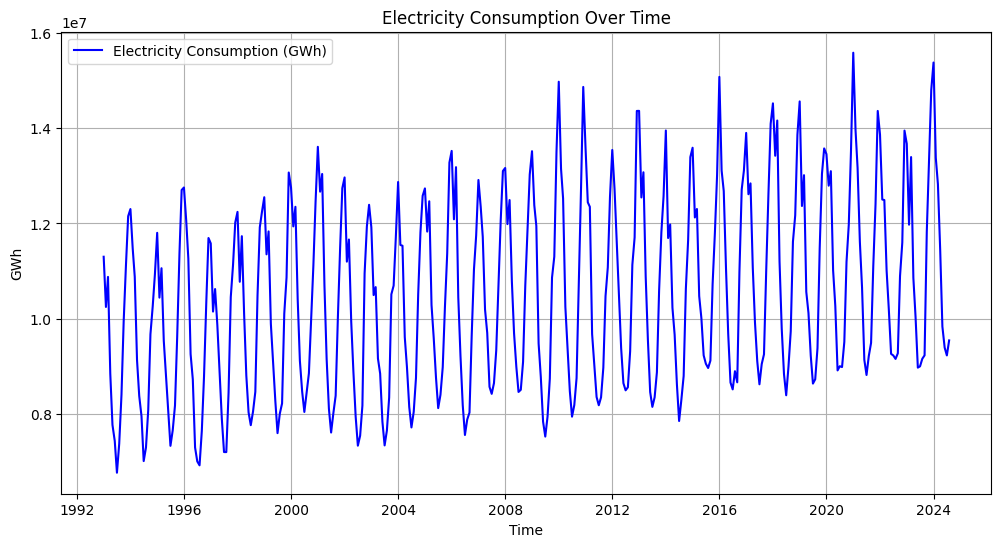

In [58]:
import matplotlib.pyplot as plt

# Plot (a): Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(elkonsum_ts.index, elkonsum_ts['GWh'], label='Electricity Consumption (GWh)', color='blue')
plt.title('Electricity Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('GWh')
plt.grid(True)
plt.legend()
plt.show()

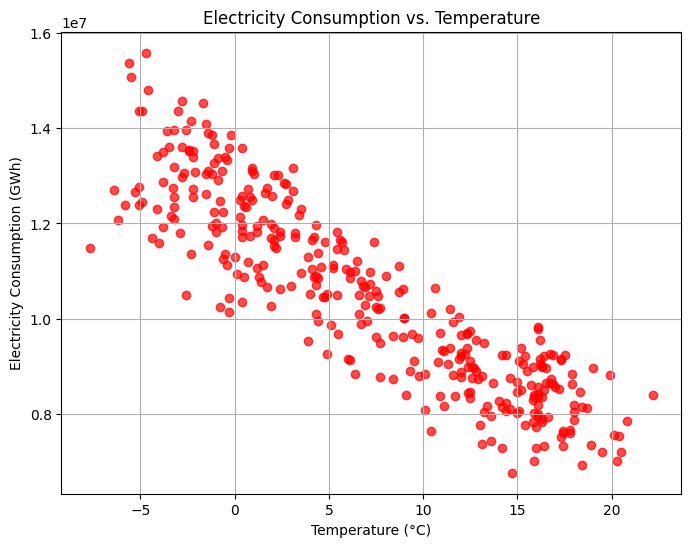

In [59]:
# Merge datasets on datetime
merged_data = elkonsum_ts.join(tempdata_ts, how='inner')

# Plot (b): Scatterplot of Electricity Consumption vs. Temperature
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Temp'], merged_data['GWh'], alpha=0.7, color='red')
plt.title('Electricity Consumption vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Consumption (GWh)')
plt.grid(True)
plt.show()

From the above scatter plot, we can observe that the points are somewhat scattered but show a clear trend, suggesting a strong negative correlation between the variables.

This trend implies that temperature is a significant factor influencing electricity consumption.

For example, we can interpret that at lower temperatures, electricity consumption is likely higher due to heating needs. As temperatures rise, heating needs decrease, resulting in lower electricity usage.

In [60]:
# 1. a Use the yahoofinancer package (R), yfinance (Python) or similar libraries to import stock market data for Equinor 
# (ticker: EQNR) from 1 July 2022 to 31 December 2024.

#!pip install yfinance
#!pip install pandas-datareader
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

eqinor_data = yf.download('EQNR', start='2022-07-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed


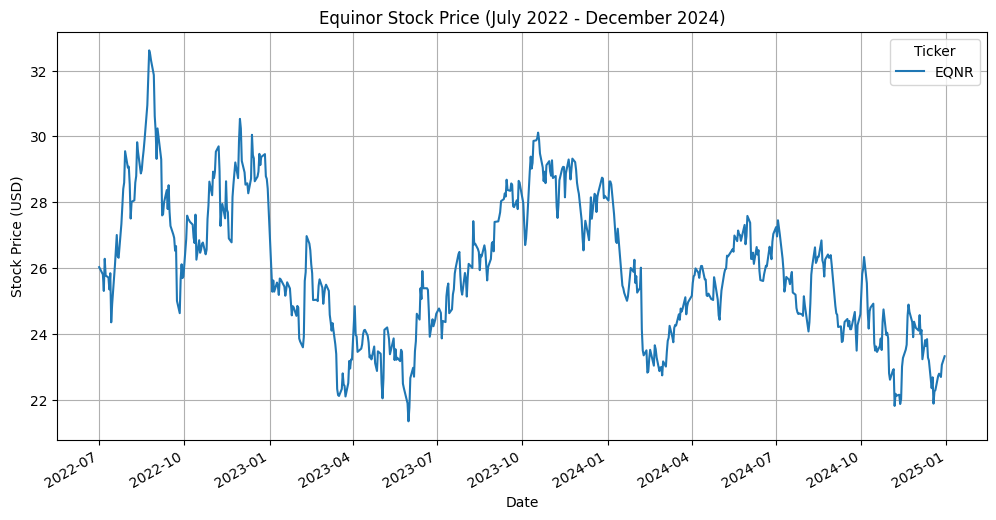

In [61]:
# 1. b. Create a time-series plot of Equinor’s stock price over this period. Identify any trends or patterns

# Task: Plotting Equinor Stock Price
eqinor_data['Close'].plot(title='Equinor Stock Price (July 2022 - December 2024)', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid()
plt.show()

From the above graph, we can observe that the price of Equinor's (EQNR) stock fluctuates a lot between July 2022 and December 2024. It went up to over USD 32 in late 2022 but dropped below USD 24 by mid-2023. It recovered to around USD 29 by late 2023, then steadily fell throughout 2024, ending near USD 22. Overall, the EQNR stock had big swings but trended lower by the end.

In [62]:
from fredapi import Fred
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Initialize FRED API
fred = Fred(api_key='f3d3c5ad1903cec2afd95423f4f9ef7c')

# Get SP500 data
sp500_data = fred.get_series('SP500')

# Convert to DataFrame
df = sp500_data.to_frame('SP500')

# Compute daily log returns
df['log_returns'] = np.log(df['SP500'] / df['SP500'].shift(1))

# Clean the data by removing any NaN values
df = df.dropna()

# Display the first few rows
print("\nFirst few rows of the data:")
print(df.head())

# Display summary statistics
print("\nSummary statistics of log returns:")
print(df['log_returns'].describe())


First few rows of the data:
              SP500  log_returns
2015-01-15  1992.67    -0.009291
2015-01-16  2019.42     0.013335
2015-01-21  2032.12     0.004720
2015-01-22  2063.15     0.015154
2015-01-23  2051.82    -0.005507

Summary statistics of log returns:
count    2420.000000
mean        0.000474
std         0.011290
min        -0.127652
25%        -0.003722
50%         0.000733
75%         0.005804
max         0.089683
Name: log_returns, dtype: float64


              SP500  log_return
2015-01-14  2011.27         NaN
2015-01-15  1992.67   -0.009291
2015-01-16  2019.42    0.013335
2015-01-19      NaN         NaN
2015-01-20  2022.55         NaN


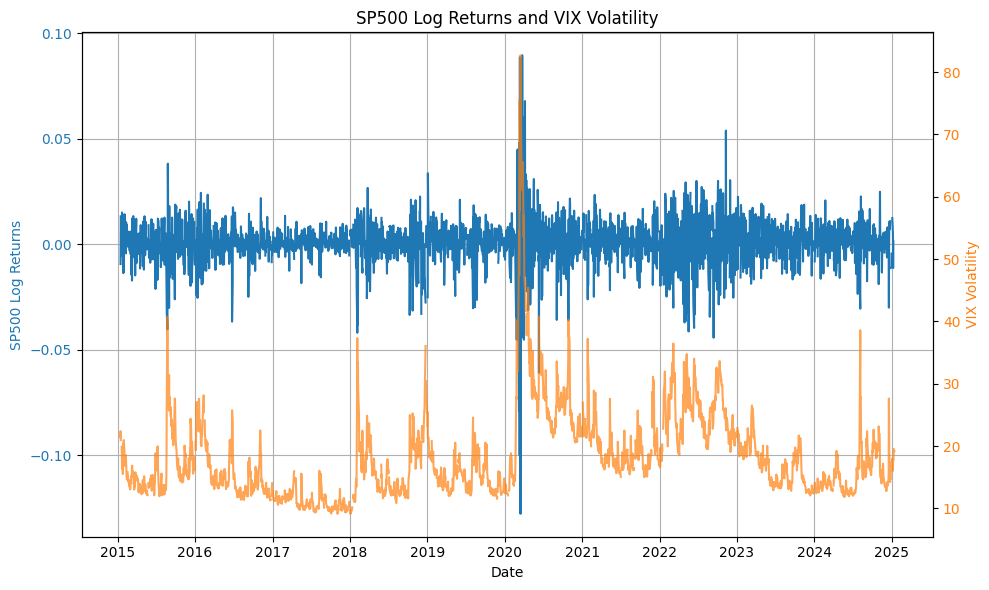

In [63]:
from fredapi import Fred
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Initialize FRED API
fred = Fred(api_key='f3d3c5ad1903cec2afd95423f4f9ef7c')

# Get SP500 data
sp500_data = fred.get_series('SP500')

# Convert to DataFrame
df_SP500 = sp500_data.to_frame('SP500')

# Get vixcls data
vixcls_data = fred.get_series('vixcls')

# Convert to DataFrame
df_vixcls = vixcls_data.to_frame('vixcls')

# Compute daily log returns for SP500
df_SP500['log_return'] = np.log(df_SP500['SP500'] / df_SP500['SP500'].shift(1))

# Check if 'log_return' column is created
print(df_SP500.head())  

# Merge SP500 and VIX data on the 'date' index
df_SP500['date'] = df_SP500.index
df_vixcls['date'] = df_vixcls.index

# Merge the dataframes on the 'date' column
df_merged = pd.merge(df_SP500[['date', 'log_return']], df_vixcls[['date', 'vixcls']], on='date', how='inner')

# Step 3: Plotting SP500 log returns and VIX on dual axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot SP500 log returns on the first axis
ax1.plot(df_merged['date'], df_merged['log_return'], color='tab:blue', label='SP500 Log Returns')
ax1.set_xlabel('Date')
ax1.set_ylabel('SP500 Log Returns', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis for VIX
ax2 = ax1.twinx()
ax2.plot(df_merged['date'], df_merged['vixcls'], color='tab:orange', label='VIX', alpha=0.7)
ax2.set_ylabel('VIX Volatility', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and grid
plt.title('SP500 Log Returns and VIX Volatility')
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Briefly comment on the relationship between SP500 returns and VIX volatility.

From the above graph we can observe the inverse relationship between SP500 log returns and VIX volatility, with periods of negative SP500 returns often coinciding with sharp spikes in VIX.

Notable examples include early 2020, where SP500 returns showed extreme negative fluctuations while VIX volatility increases significantly. Conversely, during stable market conditions, SP500 returns fluctuate near zero, and VIX levels remain relatively low, indicating reduced uncertainty.

## Reflect on how the datasets used in this assignment (electricity consumption, temperature, and stock market data) could be used for forecasting.

The datasets used in this assignment (electricity consumption, temperature, and stock market data) provides good source of time-series information that hold significant potential for forecasting. For example, electricity consumption data is particularly valuable for predicting seasonal demand patterns, as it often fluctuates with changes in weather and human activity. In particular, higher consumption of electricity in winter due to heating and in summer due to air conditioning can be accurately forecasted using time-series models, which account for trends and seasonality. Accurate predictions of electricity demand can help energy providers in optimizing resource allocation, managing peak loads, and ensuring grid stability. When paired with temperature data, these forecasts can become even more precise, as temperature is a key driver of energy use. 

Stock market data, particularly SP500 log returns and VIX volatility, offers another good source of time-series information for forecasting, with applications in financial decision-making and risk management. The inverse relationship between SP500 returns and VIX volatility can be leveraged to anticipate market trends, identify periods of high or low uncertainty, and subsequently plan investment strategies.

## Write a brief paragraph answering the following questions:

## 1. Why is forecasting important to businesses?


Forecasting is essential to businesses as it helps anticipate trends, demands, and risks, enabling informed decision-making and strategic planning. For example, in the context of the datasets (electricity consumption, temperature, and stock market data) explored in this assignment, forecasting electricity consumption allows energy providers to optimize resources, manage peak loads, and reduce costs by accurately predicting seasonal and weather-driven demand fluctuations. Temperature data enhances this by capturing the impact of weather on energy usage, improving forecasting accuracy. Similarly, stock market data, such as SP500 returns and VIX volatility, equips businesses with tools to predict market trends and manage financial risks, helping them adapt to changing economic conditions. By leveraging these datasets, businesses can minimize uncertainty, improve operational efficiency, and make better long-term decisions in different sectors such as energy, finance, and other industries.

## 2. What insights can forecasting provide from the datasets analyzed in this assignment?

Several important insights can be gained by forecasting using the datasets examined in this assignment. Utility firms can better plan for seasonal peaks by using forecasting to identify future trends in energy demand based on data on electricity consumption. This lowers expenses while guaranteeing effective energy distribution and infrastructure planning. These forecasts can be improved by adding temperature data to estimate how weather variations directly affect energy use, such as increased heating or cooling demand during extremely hot or cold conditions.

In addition, for stock market data, forecasting can reveal information about future SP500 returns or times of increased volatility, as shown by the VIX. These forecasts assist firms and investors in planning investment strategies, managing financial risks, and anticipating changes in the economy. 

Overall, forecasting using these datasets helps many companies make better decisions, allocate resources, and manage risk.

References:

Rob J.. Hyndman, & Athanasopoulos, G. (2018). Forecasting: principles and practice. Melbourne: OTexts.